In [78]:
import scipy.io
import os
import re
import pickle
from sklearn.decomposition import PCA
from FileIO import FileIO
import matplotlib.pyplot as plt
import numpy as np
import plotly
import plotly.express as px
import plotly.graph_objects as go
from scipy import signal
from sklearn.decomposition import FastICA
from PlotUtility import plot_multi_channel
from scipy.stats import entropy

In [2]:
io = FileIO()
exps = io.load_experiment('s1')
emg = exps['S1_E1_A1']['emg'].astype(int)
glove = exps['S1_E1_A1']['glove']
myo1 = emg[:,:8]
myo2 = emg[:,8:]
all_emg = np.concatenate(emg)

In [ ]:
from sklearn.metrics import mutual_info_score

def calc_MI(x, y, bins):
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

In [92]:
def get_mutual_information(x,y):
    bins = np.linspace(-128.5,128,128*2+1)
    c_xy = np.histogram2d(x, y, bins)[0]
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

def time_delay_embed(x,ndelay=10,tau=1):
    nsample = len(x)
    final_length = nsample-ndelay*tau+1
    embeded_signal = []
    for i in range(ndelay):
        embeded_signal.append(x[i*tau:i*tau+final_length])
    return np.vstack(embeded_signal)

def find_time_delay_MI(x,ndelay = 50,tau = 1):
    embedding = time_delay_embed(x,ndelay=ndelay,tau=tau)
    mis = []
    for i in range(ndelay-1):
        mis.append(get_mutual_information(embedding[0],embedding[i+1]))
    plt.plot(mis)


In [5]:
transformer = FastICA(n_components=8,random_state=0)
X_transformed = transformer.fit_transform(myo1)
X_transformed.shape

(130267, 8)

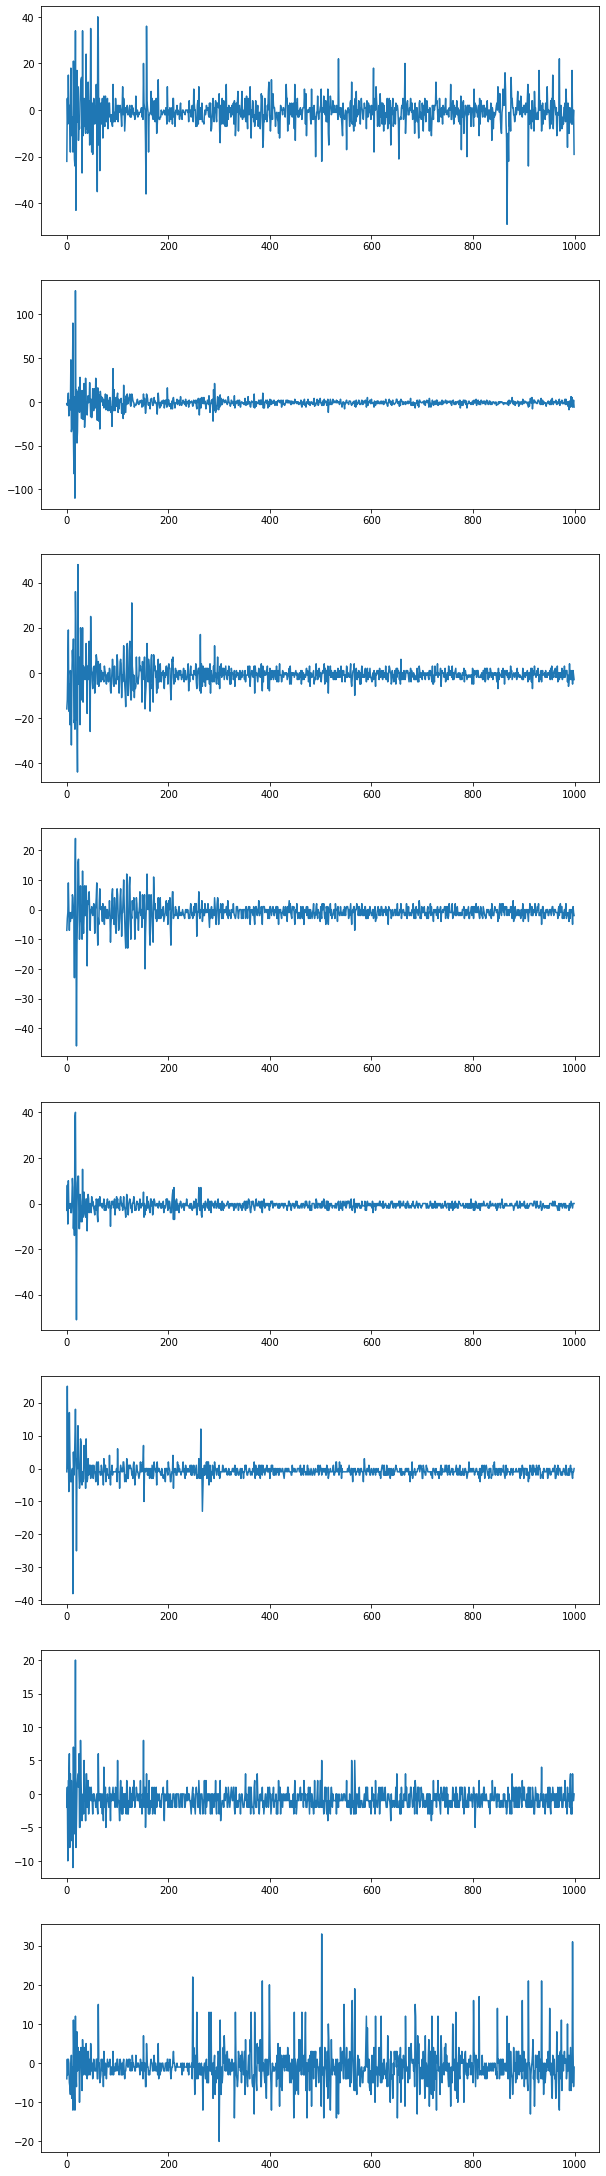

In [10]:
plot_multi_channel(myo1)

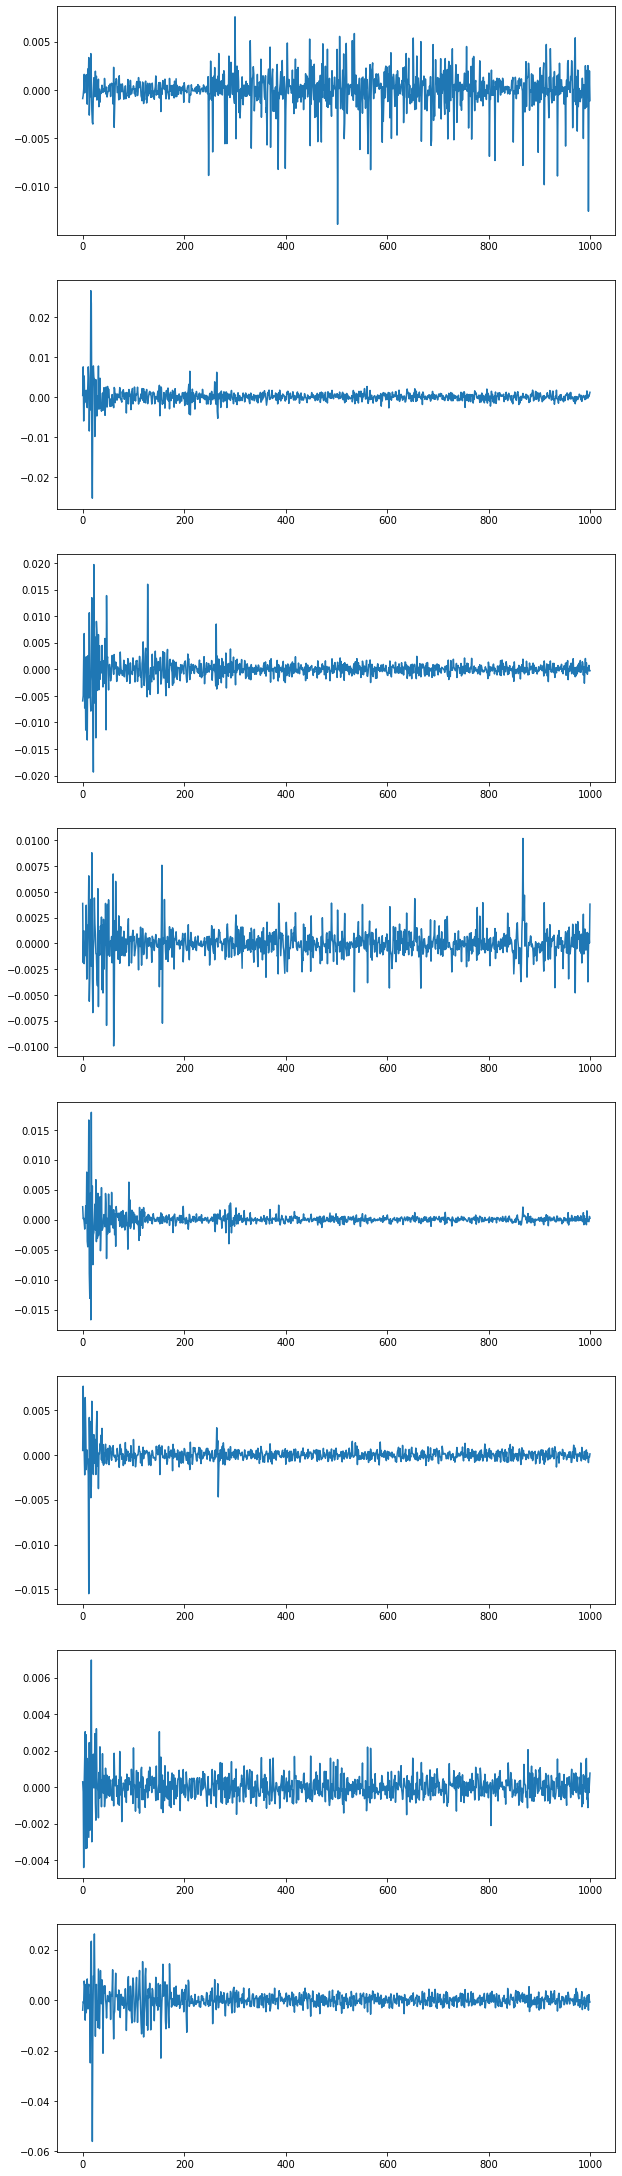

In [6]:
plot_multi_channel(X_transformed)

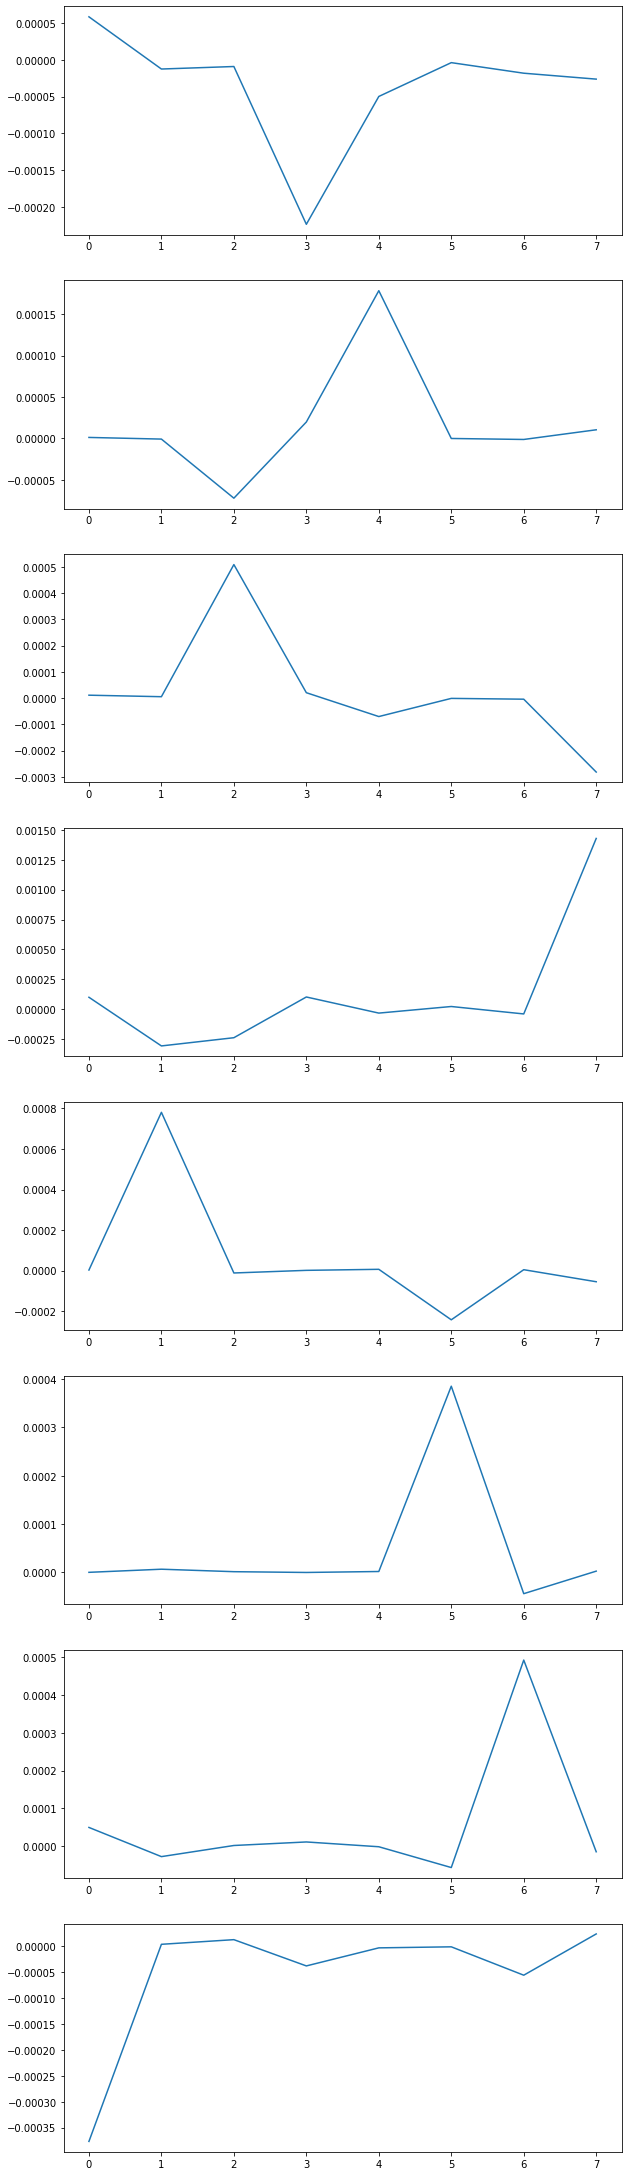

In [9]:
plot_multi_channel(transformer.components_)